# A Review of My 2024 Cycling Season

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from summaries import format_seconds, reindex_days
from IPython.display import display, HTML

In [2]:
df = pd.read_csv('activities.csv')
df['Activity Date'] = pd.to_datetime(df['Activity Date'])
df = df[(df['Activity Date'].dt.year == 2024) & (
    df['Activity Type'] == 'Ride') & (df['Commute'] == False)]
df['Distance'] = pd.to_numeric(df['Distance'])
print(df.to_string())

     Activity ID       Activity Date                                  Activity Name Activity Type                                                                                                                                                                            Activity Description  Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  Activity Private Note Activity Gear                       Filename  Athlete Weight  Bike Weight  Elapsed Time.1  Moving Time    Distance.1  Max Speed  Average Speed  Elevation Gain  Elevation Loss  Elevation Low  Elevation High  Max Grade  Average Grade  Average Positive Grade  Average Negative Grade  Max Cadence  Average Cadence  Max Heart Rate.1  Average Heart Rate  Max Watts  Average Watts     Calories  Max Temperature  Average Temperature  Relative Effort.1  Total Work  Number of Runs  Uphill Time  Downhill Time  Other Time  Perceived Exertion  Type  Start Time  Weighted Average Power  Power Count  Prefer Perceived Exertion  Percei

## General Statisics

### The rides

In [3]:
avg_dur = format_seconds(df['Elapsed Time'].mean())
avg_dist = f"{round(df['Distance'].mean(), 2)}km"
avg_elev_gain = f"{int(df['Elevation Gain'].mean())}m"
avg_hr = str(int(df['Average Heart Rate'].mean()))

max_dur = format_seconds(df['Elapsed Time'].max())
max_dist = f"{round(df['Distance'].max(), 2)}km"
max_elev_gain = f"{int(df['Elevation Gain'].max())}m"
max_hr = str(int(df['Max Heart Rate.1'].max()))

total_dur = format_seconds(df['Elapsed Time'].sum())
total_dist = f"{round(df['Distance'].sum(), 2)}km"
total_elev_gain = f"{int(df['Elevation Gain'].sum())}m"

data = {'': ['Duration', 'Distance', 'Elevation Gain', 'Heartrate'],
        'Average': [avg_dur, avg_dist, avg_elev_gain, avg_hr],
        'Max': [max_dur, max_dist, max_elev_gain, max_hr],
        'Total': [total_dur, total_dist, total_elev_gain, '']}

display(HTML(pd.DataFrame(data).to_html(index=False)))

,Average,Max,Total
Duration,01:22:57,04:52:55,109:13:40
Distance,25.41km,78.28km,2007.01km
Elevation Gain,72m,586m,5717m
Heartrate,142,188,


### The season

In [4]:
unique_dates = pd.Series(df['Activity Date'].unique()).sort_values()
diff = unique_dates.diff().dt.days
consecutive_days = (diff != 1).cumsum()
consecutive_count = unique_dates.groupby(consecutive_days).count().max()

print(f"Start: {df['Activity Date'].min().date()}")
print(f"End: {df['Activity Date'].max().date()}")
print(f"Length: {(df['Activity Date'].max() -
      df['Activity Date'].min()).days} days")
print(f"Number of days riding: {unique_dates.count()}")
print(f"Longest Consecutive Number of Days Riding: {consecutive_count}")
print(f"Longest pause: {int(diff.max())} days")

Start: 2024-02-21
End: 2024-10-24
Length: 245 days
Number of days riding: 79
Longest Consecutive Number of Days Riding: 5
Longest pause: 86 days


In [5]:
df['Week'] = df['Activity Date'].dt.isocalendar().week
weeks = df.groupby(['Week'])['Moving Time']
print(f"Average weekly ride duration: {format_seconds(weeks.sum().mean())}")
print(f"Max weekly ride duration: {format_seconds(weeks.sum().max())}")

Average weekly ride duration: 04:04:21
Max weekly ride duration: 08:51:58


### The week

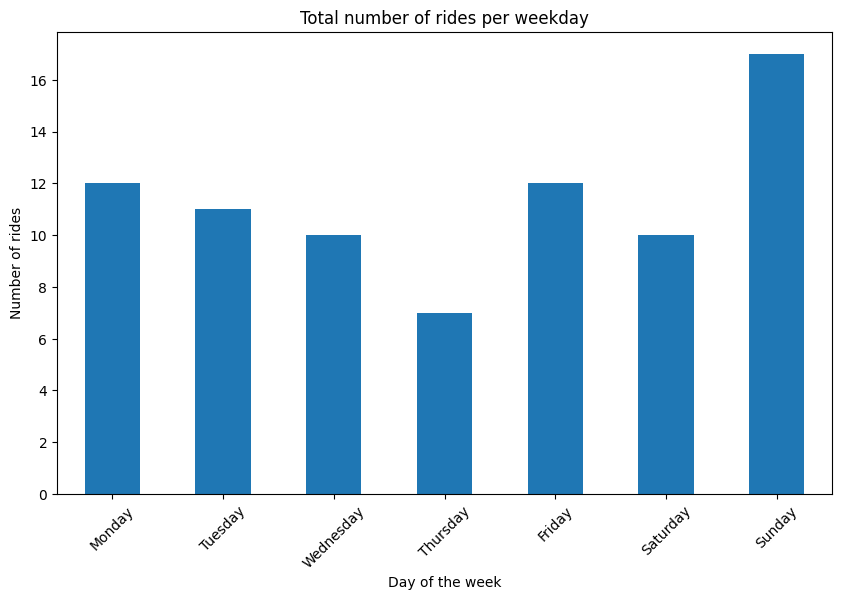

In [6]:
df['Day'] = df['Activity Date'].dt.isocalendar().day
rides_per_days = df['Day'].value_counts().sort_index()
reindex_days(rides_per_days)

plt.figure(figsize=(10,6))
rides_per_days.plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Number of rides')
plt.title('Total number of rides per weekday')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

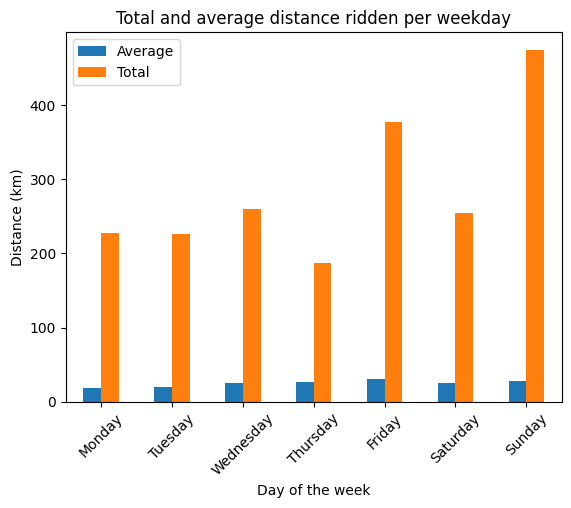

In [7]:
avg_dist_by_day = df.groupby('Day')['Distance'].mean()
avg_dist_by_day.name = 'Average'
reindex_days(avg_dist_by_day)

total_dist_by_day = df.groupby('Day')['Distance'].sum()
total_dist_by_day.name = 'Total'
reindex_days(total_dist_by_day)

dists_by_day = pd.concat([avg_dist_by_day, total_dist_by_day], axis=1)

plt.figure(figsize=(10,6))
dists_by_day.plot(kind='bar')
plt.xlabel('Day of the week')
plt.title('Total and average distance ridden per weekday')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

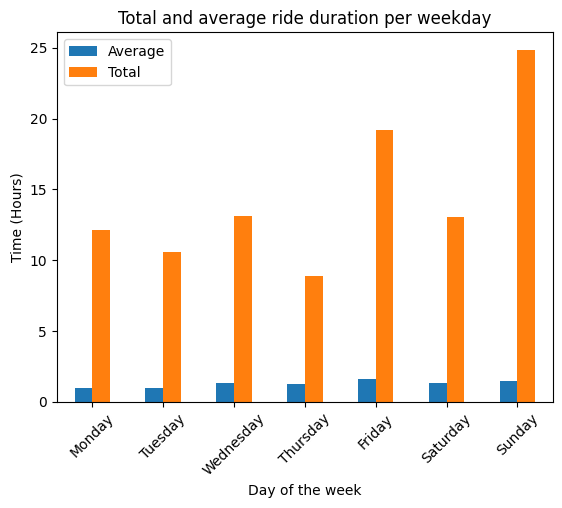

In [8]:
df['Moving Time Hours'] = df['Moving Time'].map(lambda x: x/3600)
avg_time_by_day = df.groupby('Day')['Moving Time Hours'].mean()
avg_time_by_day.name = 'Average'
reindex_days(avg_time_by_day)

total_time_by_day = df.groupby('Day')['Moving Time Hours'].sum()
total_time_by_day.name = 'Total'
reindex_days(total_time_by_day)

times_by_day = pd.concat([avg_time_by_day, total_time_by_day], axis=1)

plt.figure(figsize=(10,6))
times_by_day.plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Time (Hours)')
plt.title('Total and average ride duration per weekday')
plt.xticks(rotation=45)
plt.show()